# 911-Calls Project

## Import the data

_____
** Import numpy, pandas, and visulisation libraries **

In [109]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file and check the head **

In [110]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Explore the data

** Top 5 zipcodes, 5 townships for 911 calls? **

In [111]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [112]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## The reasons for the calls

** Create a new column called Reason from the 'title' column to explore the reason for the calls.** 

In [113]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** The most common Reason for a 911 **

In [114]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** And a countplot of 911 calls by Reason **

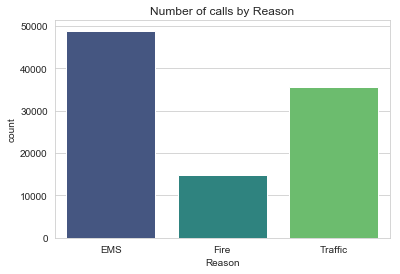

In [115]:
from pylab import savefig
sns.countplot(x='Reason',data=df,palette='viridis')
#figure = fig_countplot_reason.get_figure() 
#figure.savefig("fig_countplot_reason_1.png", dpi=400)
plt.title('Number of calls by Reason')
plt.savefig("fig_countplot_reason_1.png", dpi=400)

## Time of the calls

___
** Make new columns: Hours, Day of Week, Month, and Date from the sting type column timeStamp using pandas.to_datetime() and DataFrame.dt.hour(), DataFrame.dt.month(), and DataFrame.dt.day_name() **

In [116]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

df['Hour']=pd.to_datetime(df['timeStamp']).dt.hour # create Hour column
df['Month']=pd.to_datetime(df['timeStamp']).dt.month # create Month column
df['Day of Week']=pd.to_datetime(df['timeStamp']).dt.day_name() # create Day of Week column
df['Date']=pd.to_datetime(df['timeStamp']).dt.date # create Day of Week column
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10


** Chart showing number of calls by Month, Day of Week highlighted by Reason column. **

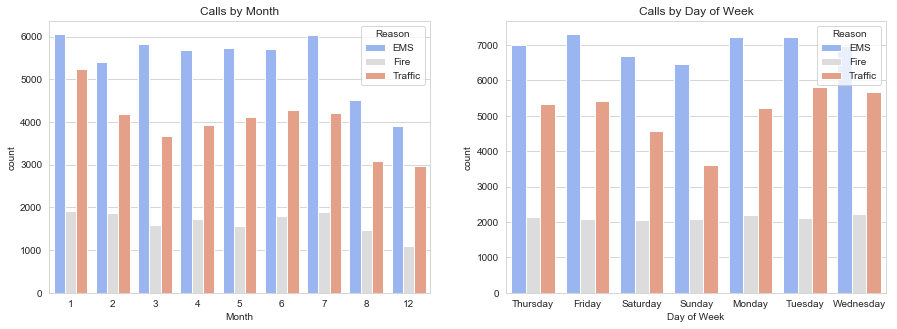

In [117]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='Day of Week',data=df,hue='Reason',palette='coolwarm', ax=axes[1])
axes[1].title.set_text('Calls by Day of Week')
sns.countplot(x='Month',data=df,hue='Reason',palette='coolwarm', ax=axes[0])
axes[0].title.set_text('Calls by Month')

plt.savefig('calls_by_time.png',dpi=250)
#figure = fig.get_figure() 
#figure.savefig("fig_countplot_reason_1.png", dpi=400)

** Linear Fit showing number of calls by month: Groupby data by Month, then using count() funtion**

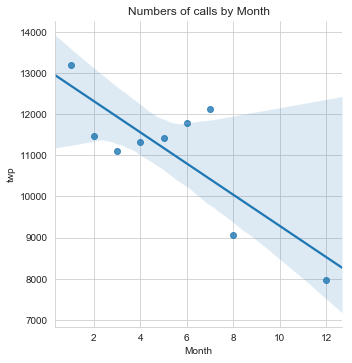

In [118]:
byMonth = df.groupby('Month').count()
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

plt.title("Numbers of calls by Month")
plt.savefig('Number_of_calls_by_Month.png',dpi=250)

** Number of calls by days for the entire period  ** 

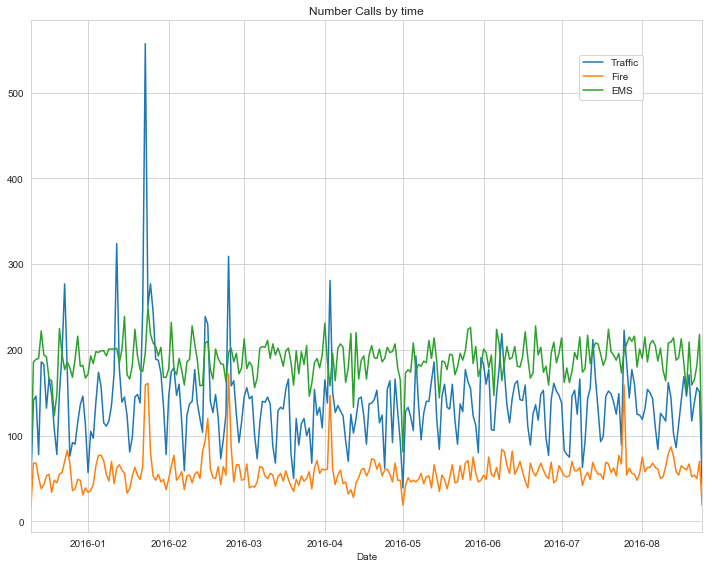

In [119]:
fig = plt.figure(figsize=(10,8))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(label="Traffic")
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(label="Fire")
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(label="EMS")
fig.legend(bbox_to_anchor=(0.9, 0.9))
plt.title('Number Calls by time')
plt.tight_layout()
plt.savefig('Number_of_calls_by_time.png',dpi=200)

____
**  Reconsture the data so the columns become the Hours and the Index becomes the Day of the Week using unstack. The cluster shows high time of 911 calls **

<Figure size 648x504 with 0 Axes>

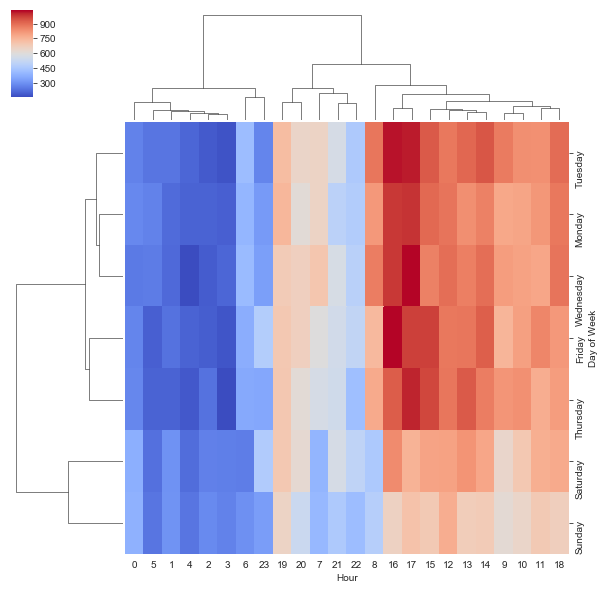

In [120]:
A=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

plt.figure(figsize=(9,7))
sns.clustermap(A,cmap='coolwarm')
plt.savefig('heatmap.png',dpi=200)

** Now create a clustermap using this DataFrame. **